## **Image Classification with The American Sign Language Dataset**

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("kapillondhe/american-sign-language")

# print("Path to dataset files:", path)

In [2]:
# import kagglehub
# import shutil
# import os

# # Define the desired target directory
# target_directory = r"ASL"

# # Ensure the target directory exists
# if not os.path.exists(target_directory):
#     os.makedirs(target_directory)

# # Move the downloaded dataset to the target directory
# for item in os.listdir(path):
#     source_path = os.path.join(path, item)
#     target_path = os.path.join(target_directory, item)
#     shutil.move(source_path, target_path)

# print(f"Dataset successfully moved to: {target_directory}")


In [3]:
import torch
import torchvision
import torchvision.datasets
import torchvision.transforms
from torch.utils.data import random_split, DataLoader


import torch.nn as nn
import torch.optim as optim

from PIL import Image
import urllib
import zipfile

In [4]:
# Transform definition to convert images to tensors in pytorch
# The series of transformations is given as an order of steps in a list

# Transform definition to resize images, convert to grayscale, and then to tensors in PyTorch
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64, 64)),             # Resize image to 128x128 pixels
    torchvision.transforms.Grayscale(num_output_channels=1),  # Convert image to grayscale
    torchvision.transforms.ToTensor(),                       # Convert image to tensor
    torchvision.transforms.Normalize((0.5,), (0.5,))          # Normalize grayscale images
])



# **Loading the Data**

To load the dataset, we use PyTorch's `ImageFolder` function. This function is ideal for datasets organized in a directory structure where each folder corresponds to a specific class.

📖 **Reference**:  
[https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html)




In [5]:
train_dataset_path = r"ASL/Train"
test_dataset_path = r"ASL/Test"


# Load training and validation datasets
train_dataset = torchvision.datasets.ImageFolder(root=train_dataset_path, transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dataset_path, transform=transform)


# Create Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [6]:
train_dataset.classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'Nothing',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'Space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [7]:
train_dataset.class_to_idx

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'Nothing': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'S': 19,
 'Space': 20,
 'T': 21,
 'U': 22,
 'V': 23,
 'W': 24,
 'X': 25,
 'Y': 26,
 'Z': 27}

In [8]:
images, labels = next(iter(train_loader))

In [9]:
images[0].shape

torch.Size([1, 64, 64])

Training Set:
Labels: ['I', 'J', 'D', 'D', 'R', 'L', 'V', 'Space']


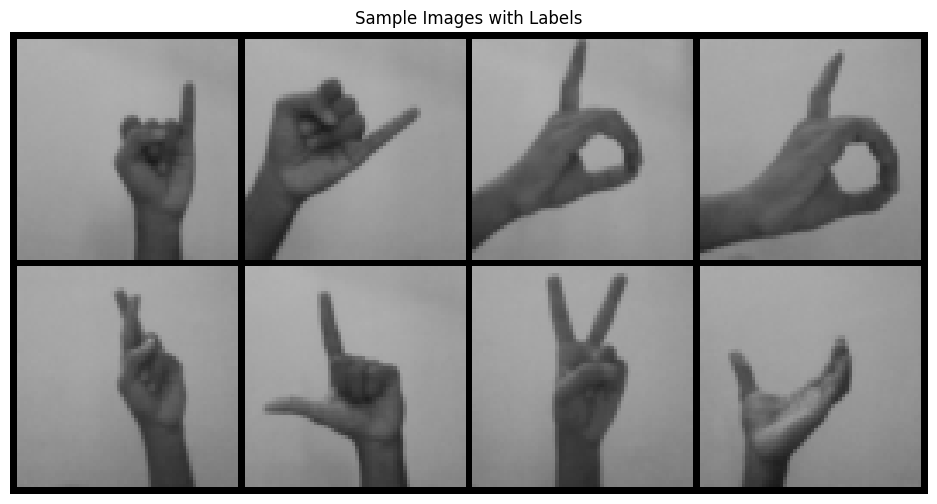

In [10]:
import matplotlib.pyplot as plt
import torchvision

# Define a function to show a batch of images with labels
def show_images(loader, dataset, num_images=8):
    # Get a batch of images and labels
    images, labels = next(iter(loader))
    
    # Ensure num_images is an integer
    num_images = int(num_images)
    
    # Denormalize images for visualization
    images = images[:num_images] * 0.5 + 0.5  # Reverse normalization (mean=0.5, std=0.5)
    
    # Create a grid of images
    grid = torchvision.utils.make_grid(images, nrow=4)
    plt.figure(figsize=(12, 6))
    plt.imshow(grid.permute(1, 2, 0))  # Change dimensions to HWC for display
    plt.axis('off')
    plt.title("Sample Images with Labels")
    
    # Print corresponding labels
    print("Labels:", [dataset.classes[label] for label in labels[:num_images]])

# Show a few training images
print("Training Set:")
show_images(train_loader, train_dataset)
plt.show()


In [11]:
# Neural Network 
class ASLClassifier(nn.Module):
    def __init__(self):
        super(ASLClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 28)
        )
        
    def forward(self, x):
        return self.model(x)
    

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ASLClassifier().to(device)

# Set the loss and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr = 0.001)

## Model Training

In [13]:
# Training

num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for image_batch, label_batch in train_loader:
        image_batch, label_batch = image_batch.to(device), label_batch.to(device)
        
        outputs = model(image_batch)
        
        loss = criterion(outputs, label_batch)
        
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        running_loss += loss.item()
        
    print(f"Epoch: {epoch+1}/{num_epochs}   Train Loss: {running_loss/len(train_loader):.4f}\n")
        

KeyboardInterrupt: 

TAKES A LOT OF TIME TO RUN!!